In [50]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [51]:
x = np.arange(0, 9, 1)

f = lambda x: np.sin(2 * np.pi / 8 * x)
f0 = np.array([f(el) for el in x])

t = np.arange(0, 8, 0.1)

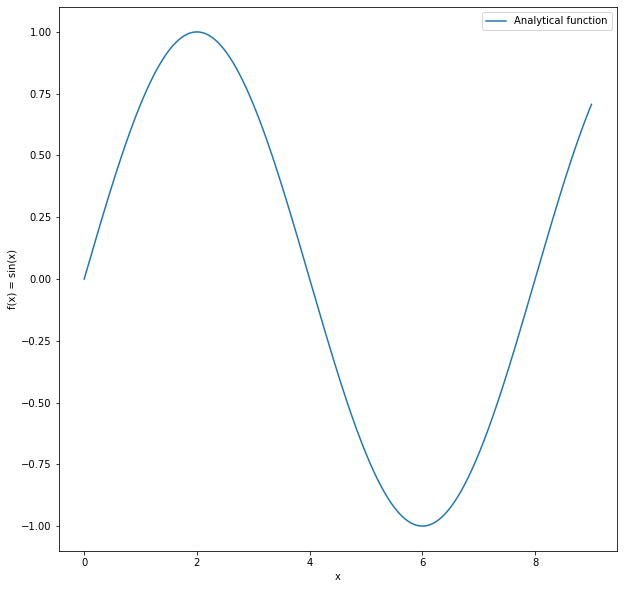

In [52]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(0, 9, 10**(-3)), np.array([f(el) for el in np.arange(0, 9, 10**(-3))]), label=f'Analytical function')
plt.xlabel('x')
plt.ylabel('f(x) = sin(x)')
plt.legend()

### Nearest neighbor

In [53]:
def nearest_neighbor(x, y, x0):
    n = x.shape[0]
    m = 0
    for i in range(0, n):
        if abs(x[i] - x0) < abs(x[m] - x0):
            m = i
    u = y[m]
    
    return u

### Linear

In [54]:
def linear(x, y, x0):
    n = x.shape[0]
    l = 0
    for i in range(0, n):
        if (abs(x[i] - x0) < abs(x[l] - x0)) and (x[i] < x0):
            l = i
    
    r = l + 1
    if l == n:
        l = n - 1
        r = n
    u = (y[r] - y[l]) * (x0 - x[l]) / (x[r] - x[l]) + y[l]
    
    return u  

### Lagrange

In [55]:
def lagrange(x, y, x0):
    n = x.shape[0]
    u = 0
    for i in range(0, n):
        Li = 1
        for j in range(0, n):
            if j != i:
                Li *= (x0 - x[j]) / (x[i] - x[j])
                
        u += y[i] * Li
    return u

### Newton

In [56]:
def diff(x, y, m, n):
    if m == n:
        r = y[n]
        return r
    r = (diff(x, y, m+1, n) - diff(x, y, m, n-1)) / (x[n] - x[m])
    return r

In [57]:
def newton(x, y, x0):
    n = x.shape[0]
    px = 1
    u = 0
    for i in range(1, n):
        u += diff(x, y, 1, i) * px
        px *= (x0 - x[i]) 
    return u

### Approximation

In [58]:
def mnk(x, y, x0, m):
    n = x.shape[0]
    
    A, B = np.zeros((m + 1, m + 1)), np.zeros((m + 1, 1))
    
    for i in range(0, m + 1):
        for j in range(0, m + 1):
            s = 0
            for k in range(0, n):
                s += x[k] ** ((i) + (j))
            A[i, j] = s
            
    for i in range(0, m + 1):
        s = 0
        for k in range(0, n):
            s += x[k] ** (i)* y[k]
        B[i] = s
            
    p = np.linalg.solve(A, B)
    
    u = 0
    for i in range(0, m + 1):
        u += p[i] * x0 ** (i)

    return u

### Comparison

In [75]:
x1, y1, y2, y3, y4, y5 = [], [], [], [], [], []

In [76]:
for i in range(len(t)):
    x1.append(t[i])
    y1.append(nearest_neighbor(x, f0, t[i]))
    y2.append(linear(x, f0, t[i]))
    y3.append(lagrange(x, f0, t[i]))
    y4.append(newton(x, f0, t[i]))
    y5.append(mnk(x, f0, t[i], 3))

In [79]:
methods = ['nearest_neighbor', 'linear', 'lagrange', 'newton', 'mnk-3']

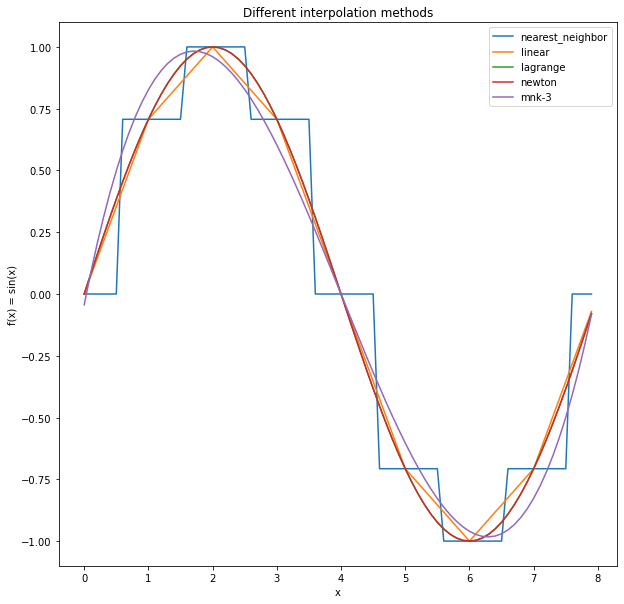

In [80]:
plt.figure(figsize=(10, 10))
plt.xlabel('x')
plt.ylabel('f(x) = sin(x)')
plt.title('Different interpolation methods')

for data in [y1, y2, y3, y4, y5]:
    plt.plot(x1, data, label=methods.pop(0))

plt.legend()